## Applied Mechanisms and Big Data
### Assignment 2: Poisson
##### Ysbrand Galama, 10262067
##### Koen Keune, 10003527

In [1]:
%pylab inline
from scipy.misc import factorial
from scipy.stats import poisson
import scipy.integrate as integrate
from scipy.optimize import brentq
from time import time
seed(1)

Populating the interactive namespace from numpy and matplotlib


## 0.1
### a

\begin{align}
P(\text{no one arrives}) = 1 - p \Delta t \\
\end{align}

### b

\begin{align}
P(n| t+\Delta t, t_0) = P(n-1| t, t_0) p \Delta t + P(n| t, t_0) (1 - p \Delta t)
\end{align}

### c

\begin{align}
\frac{\partial P(n|t + \Delta t,t_0)}{\partial t} =& \frac\partial{\partial t} P(n-1| t, t_0) p \Delta t + P(n| t, t_0) (1 - p) \Delta t \\
=& \frac\partial{\partial t} P(n-1| t, t_0) p \Delta t +\underbrace{ P(n| t, t_0)\cdot 1}_\text{const. w.r.t. $t$} - P(n| t, t_0) p \Delta t \\
=& P(n-1| t, t_0) p - P(n| t, t_0) p \\
=& -pP(n|t,t_0) + pP(n-1|t,t_0)
\end{align}

### d

\begin{align}
\frac{\partial P(0|t + \Delta t,t_0)}{\partial t} \overbrace{=}^\text{from c}& -pP(0|t,t_0) + \underbrace{pP(0-1|t,t_0)}_{=0} \\
=& -pP(0|t,t_0)
\end{align}

### e

Given $\sum^\infty_{n=0} P(n|t,t_0) = 1$ and $P(n|t,t_0)=A_n(t)e^{-p(t-t_0)}$:
\begin{align}
\sum^\infty_{n=0} A_n(t)e^{-p(t-t_0)} =& 1 \\
\sum^\infty_{n=0} A_n(t) =& e^{p(t-t_0)} \\
\sum^\infty_{n=0} A_n(t) =& \underbrace{\sum^\infty_{n=0}\frac{(p(t-t_0))^n}{n!} }_\text{definition of $e^x$} \\
A_n(t) =& \frac{(p(t-t_0))^n}{n!} \\[2pc]
P(n|t,t_0)=& A_n(t)e^{-p(t-t_0)} \\
=& \frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)}
\end{align}

### f

Using above:
\begin{align}
\mathbb{E}[n] = \sum^\infty_{n=0} nP(n|t,t_0) = \sum^\infty_{n=0} n \frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)}
\end{align}

### g

most likely visitors is:
\begin{align}
P(n|t,t_0) &> P(n-1|t,t_0) \\
\frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)} &> \frac{(p(t-t_0))^{n-1}}{(n-1)!}e^{-p(t-t_0)} \\
\frac{(p(t-t_0))^n}{n!}&> \frac{(p(t-t_0))^{n-1}}{(n-1)!} \\
\frac{(p(t-t_0))^(n-1)\cdot p(t-t_0)}{(n-1)!\cdot n}&> \frac{(p(t-t_0))^{n-1}}{(n-1)!} \\
\frac{p(t-t_0)}{n}&> 1 \\
p(t-t_0) &> n \\[2pc]
P(n|t,t_0) &> P(n+1|t,t_0) \\
\frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)} &> \frac{(p(t-t_0))^{n+1}}{(n+1)!}e^{-p(t-t_0)} \\
\frac{(p(t-t_0))^n}{n!}&> \frac{(p(t-t_0))^{n+1}}{(n+1)!} \\
\frac{(p(t-t_0))^n}{n!}&> \frac{(p(t-t_0))^n\cdot p(t-t_0)}{n!\cdot (n+1)} \\
1 &> \frac{p(t-t_0)}{n+1} \\
n+1 &> p(t-t_0) \\
n &> p(t-t_0)-1 \\[2pc]
p(t-t_0)-1 &< n < p(t-t_0) \\
\end{align}
So we can find the maximum for $P(n|t,t_0)$ if $p(t-t_0)-1 \leq n \leq p(t-t_0)$ for discrete values of $n$.

### h

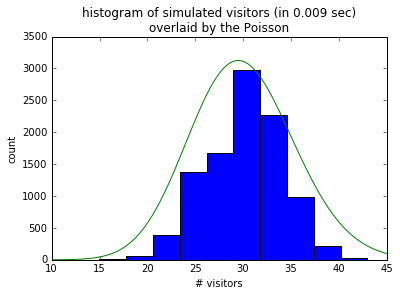

In [2]:
# loop over the times with dt=1min, and simulate the visitors.
# to improve performance, use numpy-arrays instead of looping over all repetitions

start = time()

p = 0.5 #v/m
n = np.zeros((10000,1))
dt = 1 #min
for t in arange(0,60,dt):
    n += random.uniform(size=n.shape) < p*dt

end = time()

hist(n)
title('histogram of simulated visitors (in %.3f sec)\noverlaid by the Poisson'%(end-start))
xlabel('# visitors')
ylabel('count')

x = linspace( *(xlim()+(100,)) )
mu = ceil(p*(60-0))
y = exp(-mu) * mu**x / factorial(x)
plot(x,y*3000/0.07)

### i

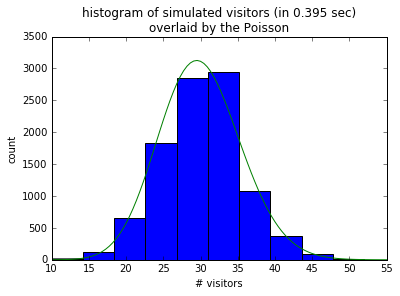

In [3]:
# loop over the times with dt=1sec, and simulate the visitors.
# to improve performance, use numpy-arrays instead of looping over all repetitions

start = time()

p = 0.5 #v/m
n = np.zeros((10000,1))
dt = 1/60 #m (i.e. 1 sec)
for t in arange(0,60,dt):
    n += random.uniform(size=n.shape) < p*dt

end = time()

hist(n)
title('histogram of simulated visitors (in %.3f sec)\noverlaid by the Poisson'%(end-start))
xlabel('# visitors')
ylabel('count')

x = linspace( *(xlim()+(100,)) )
mu = ceil(p*(60-0))
y = exp(-mu) * mu**x / factorial(x)
plot(x,y*3000/0.07)

The first distribution shows a less accurate representation. This is logical as the amount of simulations is a lot smaller. In the second distribution there is more time to ballance the chances.

### j
$$P(expecting\;n^{th}) = P(n-1\; at\; t\; AND\; arival) = P(n-1|t,t_0) pdt = dt\frac{p(p(t-t_0))^{n-1}e^{-p(t-t_0)}}{(n-1)!} = dtP(t|n,t_0)$$

### k
\begin{align}
\mathbb{E}[t] =& \int_{t_0}^\infty tpe^{-p(t-t_0)}dt \\
=& p\int_{t_0}^\infty te^{-pt}e^{pt_0}dt \\
=& pe^{pt_0}\int_{t_0}^\infty te^{-pt}dt \\
=& pe^{pt_0}\left( \left[\frac{t}{-p}e^{-pt}\right]^\infty_{t_0} -\int_{t_0}^\infty \frac1{-p}e^{-pt}dt \right)\\
=& \left[ pe^{pt_0}\left( \frac{t}{-p}e^{-pt} - \frac1{p^2}e^{-pt}  \right) \right]^\infty_{t_0}\\
=& \left[ -te^{-p(t-t_0)} - \frac1pe^{-p(t-t_0)} \right]^\infty_{t_0} \\
=& \left[ \left(-t - \frac1p\right)e^{-p(t-t_0)} \right]^\infty_{t_0} \\
=& \lim_{x\rightarrow\infty} \left[ \left(-t - \frac1p\right)e^{-p(t-t_0)} \right]^x_{t_0} \\
=& \left(\lim_{x\rightarrow\infty} \left(-x - \frac1p\right)e^{-p(x-t_0)}\right) - \left(-t_0 - \frac1p\right)e^{-p(t_0-t_0)} \\
=& 0 - \left( -t_0 - \frac1p\right) \cdot 1 \\
=& t_0 + \frac1p
\end{align}
Thus the average time for the first visitor is $t_0 + \frac1p$

### l
\begin{align}
P(t_1|1,t_0)\cdot P(t_2|1,t_1) &\\
\int^{t_2}_{t_0} P(t|1,t_0)\cdot P(t_2|1,t)dt =& \int^{t_2}_{t_0}pe^{-p(t-t_0)}pe^{-p(t_2-t)}dt \\
=& \int^{t_2}_{t_0}p^2e^{-p(t-t_0+t_2-t)}dt \\
=& \int^{t_2}_{t_0}p^2e^{-p(t_2-t_0)}dt \\
=& p^2e^{-p(t_2-t_0)}\int^{t_2}_{t_0}dt \\
=& p^2e^{-p(t_2-t_0)} \left[t\right]_{t_0}^{t_2} \\
=& p^2(t_2-t_0)e^{-p(t_2-t_0)} \\
=& \frac{p(p(t_2-t_0))^{2-1}e^{-p(t_2-t_0)}}{(2-1)!} \\
=& P(t_2|2,t_0) & q.e.d.
\end{align}

### m

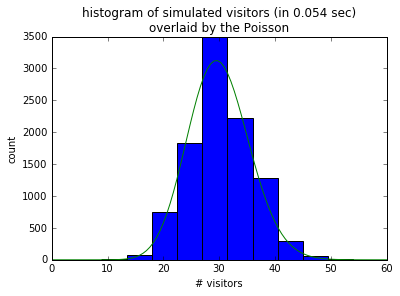

In [4]:
# loop over the times with dt=1min, and simulate the visitors.
# to improve performance, use numpy-arrays instead of looping over all repetitions

start = time()

p = 0.5 #v/m
t = zeros((1,10000),dtype=float) #min
n = -ones((1,10000),dtype=int) #v (start at -1, as the visitors is N-1)
lt = zeros((1,10000),dtype=float) #min
while any(t < 60):
    r = random.uniform(size=n.shape)
    pdf_inv = log(r/p)/-p
    # numpy equivalent to: if pdf_inv > 0 and t < 60
    b = logical_and(pdf_inv > 0 , t < 60)
    n[b] += 1
    t[b] += pdf_inv[b]

end = time()

hist(n[0])
title('histogram of simulated visitors (in %.3f sec)\noverlaid by the Poisson'%(end-start))
xlabel('# visitors')
ylabel('count')

x = linspace( *(xlim()+(100,)) )
mu = ceil(p*(60-0))
y = exp(-mu) * mu**x / factorial(x)
plot(x,y*3000/0.07)

There is not much difference between this distribution and the second one. Both follow the poisson reasonable. A difference is the time it took to calculate the third one is more in the same ballpark as the first one, which did not have a satisfiable result.

### n
Now we only need to generate as much times per sample as there are visitors (i.e. $\pm30$). With $\Delta t=1$sec, there were $3600$ generated values per sample. In other words, we now have a better resolution ($\lim_{t\downarrow0} \Delta t$) with just a small part of the computation time.

### o
We want to solve:
\begin{align}
\int_{t_0}^t P(t_n|n,t_0)P(0|t,t_n) dt_n &= \int_{t_0}^t \frac{p(p(t_n-t_0))^{n-1}e^{-p(t_n-t_0)}}{(n-1)!}e^{-p(t-t_n)}dt_n \\
&= \frac{p}{(n-1)!} \int_{t_0}^t (p(t_n-t_0))^{n-1}e^{-p(t_n-t_0)-p(t-t_n)}dt_n \\
&= \frac{p}{(n-1)!} \int_{t_0}^t (p(t_n-t_0))^{n-1}e^{-p(t-t_0)}dt_n \\
&= \frac{p}{(n-1)!}e^{-p(t-t_0)} \int_{t_0}^t (p(t_n-t_0))^{n-1}dt_n \\
&= \frac{p}{(n-1)!}e^{-p(t-t_0)} \left[ \frac1{pn}(p(t_n-t_0))^{n} \right]_{t_0}^t \\
&= \frac{p}{(n-1)!}e^{-p(t-t_0)} \left( \left( \frac1{np}(p(t-t_0))^{n} \right) - \underbrace{\left( \frac1{np}(p(t_0-t_0))^{n} \right)}_{=0} \right) \\
&= \frac{(p(t-t_0))^{n}}{n!}e^{-p(t-t_0)} \\
&= P(n|t,t_0) & q.e.d
\end{align}

## 0.2
### a
Using the same derivation as 0.1e, only now assuming the Ansatz $P(n|t,t_0)=A_n(t)e^{-\int^{t}_{t_0}p(s)d(s)}$ we get the result:
\begin{align}
\frac{dP(n|t,t_0)}{dt} &= -p(t)\cdot P(n|t,t_0) + p(t)\cdot P(n-1|t,t_0) \\
P(n|t,t_0) &= \frac{\left(\int^{t}_{t_0} p(s)ds\right)^ne^{-\int^{t}_{t_0} p(s)ds}}{n!}
\end{align}


### b
The probability of no arival (ever) is equal to $1-P(\text{an arrival})$:
\begin{align}
1-\lim_{t\rightarrow\infty} P(1|t,t_0) &= 1-\lim_{t\rightarrow\infty} \frac{\left(\int^{t}_{t_0} p(s)ds\right)^1e^{-\int^{t}_{t_0} p(s)ds}}{1!} \\
&= 1-\lim_{t\rightarrow\infty} \int^{t}_{t_0} p(s)ds\cdot e^{-\int^{t}_{t_0} p(s)ds}
\end{align}

Therefore, the probability of no-one arriving is one if $\lim_{t\rightarrow\infty} \int^{t}_{t_0} p(s)ds\cdot e^{-\int^{t}_{t_0} p(s)ds}=0$, which can only be the case when $\lim_{t\rightarrow\infty} \int^{t}_{t_0} p(s)ds = 0$ (as $\forall x\, e^x\neq 0$). This last is the case when $\forall t\, p(t)=0$. i.e. No one will arive when the probability of an arival at any time equals zero.

With a constant rate this would only be possible if $p=0$. 

### c
$$ P(t|n,t_0) = \frac{ p(t)\left(\int^{t}_{t_0} p(s)ds \right)^{n-1}e^{-\int^{t}_{t_0} p(s)ds}}{(n-1)!} $$

### d
\begin{align}
P(t|1,t_0) &= p(t)e^{-\int_{t_0}^tp(s)ds} \\
\int_{t_0}^{t_2}P(t_1|1,t_0)P(t_2|1,t_1)dt_1 &= \int_{t_0}^{t_2} p(t_1)e^{-\int_{t_0}^{t_1}p(s)ds}  p(t_2)e^{-\int_{t_1}^{t_2}p(s)ds}  dt_1 \\
&= p(t_2) \int_{t_0}^{t_2} p(t_1)e^{-\int_{t_0}^{t_1}p(s)ds -\int_{t_1}^{t_2}p(s)ds}  dt_1 \\
&= p(t_2) \int_{t_0}^{t_2} p(t_1)e^{-\int_{t_0}^{t_2}p(s)ds}  dt_1 \\
&= p(t_2)\int^{t_2}_{t_0} p(s)ds\,e^{-\int^{t_2}_{t_0} p(s)ds} \\
&= P(t_2|2,t_0)
\end{align}

### e

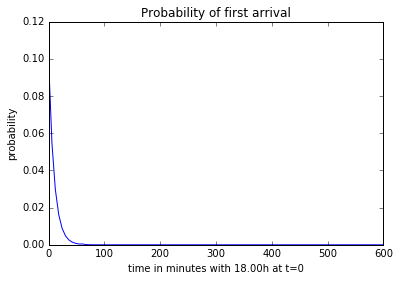

In [5]:
# defining the probabilityfunctions over time, again using numpy arrays

__FUN = list(zip(range(18,26),[.1,.2,.3,.4,.5,.6,.3,.1])) # blocks
__T0 = 18 # hours

def p(t):
    """returns probability at time t (in minutes) according to block function
    """
    if type(t) != array:
        t = array(t)
    t = (t/60) + __T0
    ans = zeros(t.shape)
    for i,r in __FUN:
        b = logical_and(i<= t, t < i+1)
        ans[b] = r
    return ans

def integral_p(u,l=None):
    """returns the integral of p(t).
    calculated to improve performance.
    use integral_p(u) for \int_0^u p(t) dt
    use integral_p(l,u) for \int_l^u p(t) dt
    """
    if type(u) != array: u = array(u)
    if l is None: l = zeros(u.shape)
    else: t=u;u=l;l=t
    if type(u) != array: u = array(u)
    assert l.shape == u.shape
    assert all(l <= u)
    ans = zeros(u.shape)
    l,u = (l/60) + __T0, (u/60) + __T0
    for i,r in __FUN:
        # numpy equivalent of switch
        b = p = l > i+1
        b = logical_and(~p, logical_and(logical_and(i <= l, l < i+1),u >= i+1))
        p = logical_or(p,b)
        ans[b] += (i+1-l[b])*r
        b = logical_and(~p,logical_and(i < l, l < i+1))
        p = logical_or(p,b)
        ans[b] += (u[b]-l[b])*r
        b = logical_and(~p,logical_and(i <= u, u < i+1))
        p = logical_or(p,b)
        ans[b] += (u[b]-i)*r
        b = logical_and(~p,i+1<u)
        p = logical_or(p,b)
        ans[b] += r
    return ans*60

t = linspace(0,600,100)
y = p(t)*exp(-integral_p(t))
plot(t,y)
title('Probability of first arrival')
xlabel('time in minutes with 18.00h at t=0')
ylabel('probability')

### f

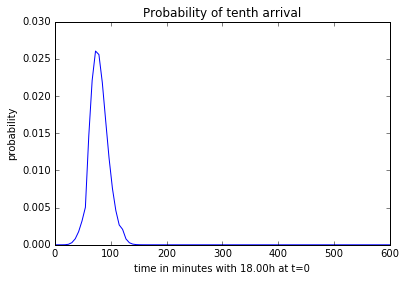

In [6]:
t = linspace(0,600,100)
psds = integral_p(t)
y = p(t)*psds**9*exp(-psds)/factorial(9)
plot(t,y)
title('Probability of tenth arrival')
xlabel('time in minutes with 18.00h at t=0')
ylabel('probability')

### g

In [7]:
# defining sample functions for time-dependent rate

__INTEGRATE_ACCURACY = 5e-2 # minutes
__INTEGRAL_MAX = 100 # minutes

def sample(t0):
    """Returns a single sample for an array of times
    """
    func_to_integrate = lambda tau: p(tau+t0)*exp(-integral_p(t0,tau+t0))
    r = random.uniform(size=t0.shape)
    integral = zeros(t0.shape)
    t = zeros(t0.shape)
    b = [True]
    # calculate integral with sum of small timesteps
    while any(b):
        # numpy equivalent of: if integral < r and t < __INTEGRAL_MAX
        b = logical_and(integral < r, t < __INTEGRAL_MAX)
        integral[b] += func_to_integrate(t)[b]*__INTEGRATE_ACCURACY
        t[b] += __INTEGRATE_ACCURACY
    return t

def party_sample(it=1000,t_end=8*60,verbatim=False):
    """calculates a full sample of the party.
    returns t1 - time of first arrival
            t10 - time of tenth arrival
            num - total number of visitors
    """
    t0 = zeros(it)
    t1 = zeros(it)
    t10 = zeros(it)
    num = zeros(it)
    B = t0 < t_end
    c = 0
    # loop until all parties are over
    while any(B):
        c+=1
        if verbatim and c%10 == 0:
            print('%d out of %d busy'%(sum(B),len(B)))
        t = sample(t0)
        t0[B] += t[B]
        num[B] += 1
        b = num == 1
        t1[b] = t0[b]
        b = num == 10
        t10[b] = t0[b]
        B = t0 < t_end
    return t1,t10,num

### h

Wall time: 1min 50s


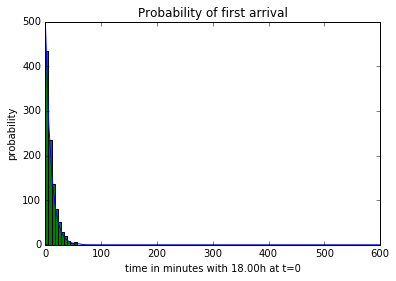

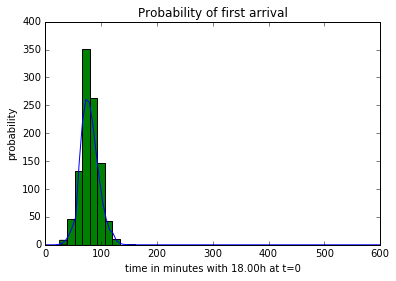

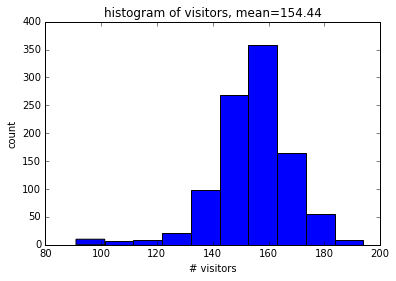

In [8]:
# calculating and showing results of time-dependent sampling
# takes about 2 min on my pc

%time t1,t10,num = party_sample()

t = linspace(0,600,100)
y = p(t)*exp(-integral_p(t))*(400/.08)
plot(t,y)
hist(t1)
title('Probability of first arrival')
xlabel('time in minutes with 18.00h at t=0')
ylabel('probability')

figure();
t = linspace(0,600,100)
psds = integral_p(t)
y = p(t)*psds**9*exp(-psds)/factorial(9)*(250/.025)
plot(t,y)
hist(t10)
title('Probability of tenth arrival')
xlabel('time in minutes with 18.00h at t=0')
ylabel('probability')

figure();
hist(num)
title('histogram of visitors, mean=%.2f'%(mean(num)) )
xlabel('# visitors')
ylabel('count')

As we can see from the figures, the probability of the first and tenth arival are very similar to the formulae. Moreover the mean of the visitors is 1.., which is close to the expected 150.

## 0.3

### a
The function $p(n,t)e^{-\int_{t_0}^tp(n,s)ds}$ is very similar to the previous function in 0.2. The only difference is that the probability of the arrival is now also dependent on the amount of visitors. This is a simplified model, as $t$ and $n$ do not have to be independent, an integral over the amount of visitors would be necessary to accieve this.

### b
\begin{align}
P(t_1|1,t_0)\cdot P(t_2|1,t_1) &= p(0,t_1)e^{-\int_{t_0}^{t_1}p(0,s)ds} \cdot p(1,t_2)e^{-\int_{t_1}^{t_2}p(1,s)ds}
\end{align}

### c
When integrating this:
\begin{align}
\int_{t_0}^{t_2} P(t_1|1,t_0)\cdot P(t_2|1,t_1) dt_1 &= \int_{t_0}^{t_2} p(0,t_1)e^{-\int_{t_0}^{t_1}p(0,s)ds} \cdot p(1,t_2)e^{-\int_{t_1}^{t_2}p(1,s)ds} dt_1 \\
&= p(1,t_2) \int_{t_0}^{t_2} p(0,t_1) e^{-\int_{t_0}^{t_1}p(0,s)ds -\int_{t_1}^{t_2}p(1,s)ds} dt_1
\end{align}
Which does not have a nice solution as before, because $p(0,s) \neq p(1,s)$ (at least not necessarily).

### d

In [9]:
# defining sample functions for time-dependent rate

def p_n(t,n):
    """probability now also dependent on n"""
    tmp = exp(-0.05*(n-100))
    return p(t)*tmp/(1+tmp)

def integral_p_n(u,l,n):
    """integral not much different, as the new factor is independent of time"""
    tmp = exp(-0.05*(n-100))
    return integral_p(u,l)*tmp/(1+tmp)

def sample_n(t0,num):
    """similar function as sample(t0), only now with n"""
    func_to_integrate = lambda tau: p_n(tau+t0,num)*exp(-integral_p_n(t0,tau+t0,num))
    r = random.uniform(size=t0.shape)
    integral = zeros(t0.shape)
    t = zeros(t0.shape)
    b = [True]
    while any(b):
        b = logical_and(integral < r, t < __INTEGRAL_MAX)
        integral[b] += func_to_integrate(t)[b]*__INTEGRATE_ACCURACY
        t[b] += __INTEGRATE_ACCURACY
    return t

def party_sample_n(it=1000,t_end=8*60,verbatim=False):
    """similar function as party_sample(), only now with n"""
    t0 = zeros(it)
    t1 = zeros(it)
    t10 = zeros(it)
    num = zeros(it)
    B = t0 < t_end
    c = 0
    while any(B):
        c+=1
        if verbatim and c%10 == 0:
            print('%d out of %d busy'%(sum(B),len(B)))
        t = sample_n(t0,num)
        t0[B] += t[B]
        num[B] += 1
        b = num == 1
        t1[b] = t0[b]
        b = num == 10
        t10[b] = t0[b]
        B = t0 < t_end
    return num

### e

Wall time: 1min 6s


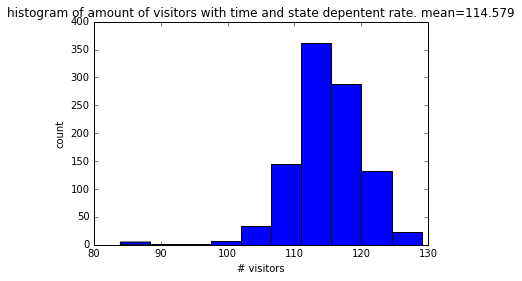

In [10]:
# computing and showing result
%time num_n = party_sample_n(1000)

hist(num_n)
title('histogram of amount of visitors with time and state depentent rate. mean=%.3f'%(mean(num_n)) )
xlabel('# visitors')
ylabel('count')